In [79]:
import numpy as np
import math
from functions import KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(2000)

In [80]:
x = np.random.uniform(0,5,1000)
y = 2*x**2 + x + np.random.normal(0,1,len(x))


In [81]:
k = 5
k_fold_size = math.floor(len(y)/k)
k_fold_size

200

In [82]:
x_new,y_new = KFold(x,y,k)

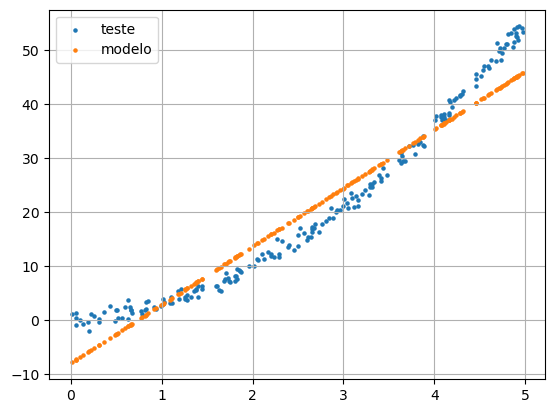

In [83]:
err = np.empty(k)
for i in range(k):
    x_test = x_new[i,:].copy().reshape(-1,1)
    y_test = y_new[i,:].copy()
    x_training = np.array([])
    y_training = np.array([])
    for j in range(k):
        if i != j:
            x_training = np.r_[x_new[j,:].copy().reshape(-1,1)]
            y_training = np.r_[y_new[j,:].copy()]
    
    model = Pipeline([
        ('std_scaler' ,StandardScaler()),
        ('lin_reg',LinearRegression())
    ])
    model.fit(x_training,y_training)
    err[i] = mean_squared_error(y_test,model.predict(x_test))
plt.scatter(x_test,y_test,label='teste',s=5)
plt.scatter(x_test,model.predict(x_test),label='modelo',s=5)
plt.legend()
plt.grid(True)

In [84]:
err

array([14.00418953, 12.95462264, 13.25656941, 15.73778447, 16.93662462])

In [85]:
x_train = x_new[1,:].copy()
y_train = y_new[1,:].copy()

In [86]:
x_train = np.array([])
y_train = np.array([])
for i in range(k):
    if i != 1:
        x_train = np.r_[x_new[i,:].copy().reshape(-1,1)]
        y_train = np.r_[y_new[i,:].copy()]
model.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

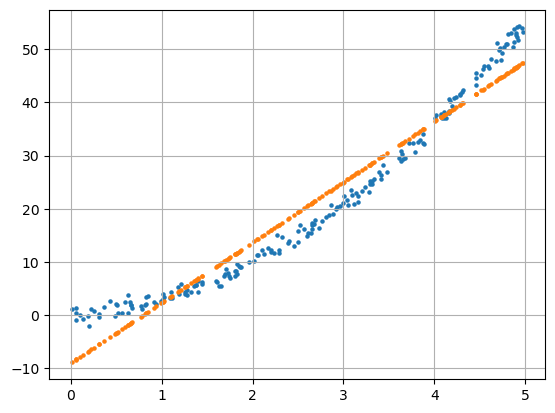

In [87]:
plt.scatter(x_test,y_test,s=5)
plt.scatter(x_test,model.predict(x_test),s=5)
plt.grid(True)

In [88]:
model['lin_reg'].coef_

array([16.71052311])

O erro total é:

In [89]:
1/k * np.sum(err)

14.577958132363808